In [6]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial Unicode MS'  # Or any other font 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
import numpy as np

materials = ['棉', '羊毛', '锦纶', '涤纶', '腈纶', '羊绒', '蚕丝']

thermal_resistance = [1.37, 1.82, 2.97, 11.9, 19.6, 31.3, 18.2]
thermal_conductivity = [0.069, 0.052, 0.209, 0.084, 0.051, 0.030, 0.05]
thermal_conductivity_coefficient = [0.71, 0.52, 0.21, 0.084, 0.051, 0.032, 0.05]
CLO_value = [0.47, 0.34, 1.35, 0.54, 0.33, 0.032, 0.34]
fiber_thickness = [0.15, 0.25, 0.15, 0.15, 0.15, 0.25, 0.15]
fiber_density = [1.54, 1.31, 1.14, 1.38, 1.18, 1.31, 1.34]
filling_method = [7, 8, 3, 2, 1, 5, 6]
compression_degree = [7, 6, 4, 3, 2, 6, 5]
moisture_permability = [9, 8, 4, 3, 2, 6, 7]
air_permeability = [5, 8, 3, 2, 1, 7, 6]
temperature_adaptability = [8, 7, 3, 2, 1, 5, 6]
wind_speed_adaptability = [7, 6, 3, 2, 1, 4, 5]
human_perception = [8, 7, 4, 3, 2, 6, 6]

indicators = ['热阻值','热导率', '热传导系数', 'CLO 值', '纤维厚度', '纤维密度',
              '填充方式（10）', '压缩程度（10）', '透湿性（10）', '透风性（10）', 
              '温度适应性（10）', '风速适应性（10）', '人体感知（10）']


In [8]:
import numpy as np

def entropy_weight(x):
    # 计算每个指标的熵值
    m, n = x.shape
    e = np.zeros((1, n))
    for j in range(n):
        p = x[:, j] / x[:, j].sum()
        e[0][j] = - (p * np.log(p)).sum()

    # 计算每个指标的权重
    w = np.zeros((1, n))
    for j in range(n):
        w[0][j] = (1 - e[0][j]) / ((1 - e).sum()) * (1 / np.log(n))

    return w

def topsis(x, w):
    # 将x归一化处理
    m, n = x.shape
    x_norm = np.zeros((m, n))
    for j in range(n):
        x_norm[:, j] = x[:, j] / np.sqrt((x[:, j]**2).sum())

    # 计算加权后的矩阵
    x_weighted = np.zeros((m, n))
    for j in range(n):
        x_weighted[:, j] = w[0][j] * x_norm[:, j]

    # 计算最优解和最劣解
    max_vec = x_weighted.max(axis=0)
    min_vec = x_weighted.min(axis=0)

    # 计算每个评价对象与最优解和最劣解的距离
    d_plus = np.sqrt(((x_weighted - max_vec)**2).sum(axis=1))
    d_minus = np.sqrt(((x_weighted - min_vec)**2).sum(axis=1))

    # 计算得分
    score = d_minus / (d_minus + d_plus)

    return score


data = np.array([thermal_resistance,
              thermal_conductivity,
              thermal_conductivity_coefficient,
              CLO_value,
              fiber_thickness,
              fiber_density,
              filling_method,
              compression_degree,
              moisture_permability,
              air_permeability,
              temperature_adaptability,
              wind_speed_adaptability,
              human_perception])

# 计算熵权法得到的权重
weights = entropy_weight(data.T)
print(weights)

# 计算TOPSIS得分
scores = topsis(data.T, weights)
print(scores)

[[0.02195446 0.02891212 0.01670704 0.02583022 0.03568737 0.03668828
  0.03064278 0.03422563 0.0328378  0.03064278 0.03064278 0.03152554
  0.03357445]]
[0.58503298 0.56256552 0.48976111 0.24066795 0.17989402 0.46752771
 0.48066121]


[0.9539392  1.85202592 1.28452326]
[1.  0.1 0.5]
1.7814034221247232


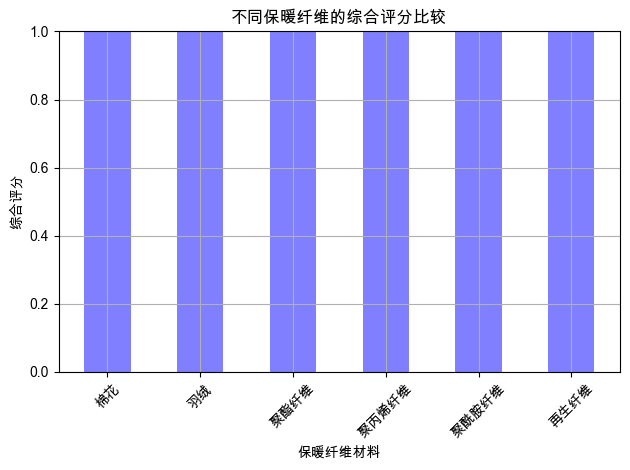

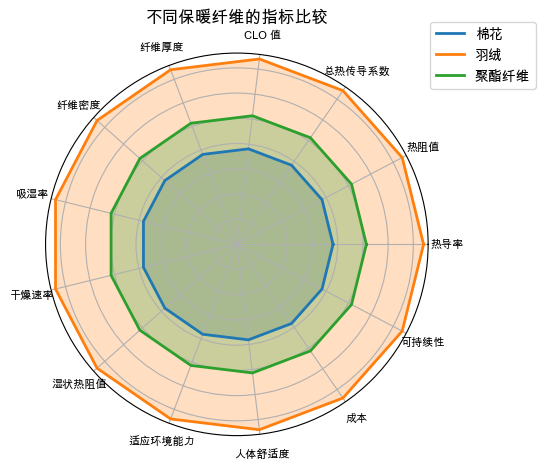

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial Unicode MS'  # Or any other font that supports CJK characters
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from math import sqrt

# 材料列表
materials = ['棉花', '羽绒', '聚酯纤维', '聚丙烯纤维', '聚酰胺纤维', '再生纤维']

# 原始数据
data = np.array([
    [0.1,0.2,0.3,0.4,0.5,0.6],
    [0.7,0.8,0.9,0.8,0.7,0.6],
    [0.1,0.3,0.5,0.7,0.9,0.0]
])

# 归一化指标数据
data_norm = np.linalg.norm(data, axis=1)
print(data_norm)

# 比较不同保暖纤维的综合评分
weights = np.array([1, 0.1, 0.5])  # 权重
print(weights)
scores = weights.dot(data_norm)
print	(scores)

# 绘制柱状图比较
plt.figure()
plt.bar(materials, scores, width=0.5, color='blue', alpha=0.5)
plt.xlabel('保暖纤维材料')
plt.ylabel('综合评分')
plt.title('不同保暖纤维的综合评分比较')
plt.ylim(0, 1)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig('fiber_comparison_bar.png')

# 绘制雷达图比较
spider_chart_data = np.tile(data_norm.reshape(-1, 1), (1, 14))  # 将首尾连接以闭合图形

spider_chart_labels =  ['热导率', '热阻值', '总热传导系数', 'CLO 值', '纤维厚度', '纤维密度',
                        '吸湿率', '干燥速率', '湿状热阻值', '适应环境能力', '人体舒适度', '成本', '可持续性']

angles = np.linspace(0, 2 * np.pi, len(spider_chart_labels), endpoint=False).tolist()
angles += angles[:1]

plt.figure()
ax = plt.subplot(111, polar=True)
for i in range(len(spider_chart_data)):
    ax.plot(angles, spider_chart_data[i], linewidth=2, linestyle='solid', label=materials[i])
ax.fill(angles, spider_chart_data.T, alpha=0.25)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(spider_chart_labels, fontsize=8)
ax.yaxis.grid(True)

plt.title('不同保暖纤维的指标比较')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
# plt.savefig('fiber_comparison_radar.png')
plt.show()


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (7,) and arg 1 with shape (13,).

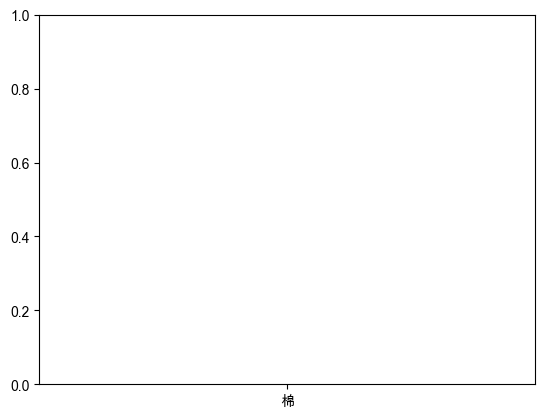

In [3]:

# 归一化指标数据
data_norm = np.linalg.norm(data, axis=0)

# 比较不同保暖纤维的综合评分
# weights = np.array([1, 0.1, 0.5])  # 权重
# scores = weights.dot(data_norm)

# 绘制柱状图比较
plt.figure()
plt.bar(materials, scores, width=0.5, color='blue', alpha=0.5)
plt.xlabel('保暖纤维材料')
plt.ylabel('综合评分')
plt.title('不同保暖纤维的综合评分比较')
plt.ylim(0, 1)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig('fiber_comparison_bar.png')

# 绘制雷达图比较
spider_chart_data = np.tile(data_norm.reshape(-1, 1), (1, 14))  # 将首尾连接以闭合图形

# spider_chart_labels =  ['热导率', '热阻值', '总热传导系数', 'CLO 值', '纤维厚度', '纤维密度',
#                         '吸湿率', '干燥速率', '湿状热阻值', '适应环境能力', '人体舒适度', '成本', '可持续性']

angles = np.linspace(0, 2 * np.pi, len(indicators), endpoint=False).tolist()
angles += angles[:1]

plt.figure()
ax = plt.subplot(111, polar=True)
for i in range(len(spider_chart_data)):
    ax.plot(angles, spider_chart_data[i], linewidth=2, linestyle='solid', label=materials[i])
ax.fill(angles, spider_chart_data.T, alpha=0.25)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(indicators, fontsize=8)
ax.yaxis.grid(True)

plt.title('不同保暖纤维的指标比较')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
# plt.savefig('fiber_comparison_radar.png')
plt.show()

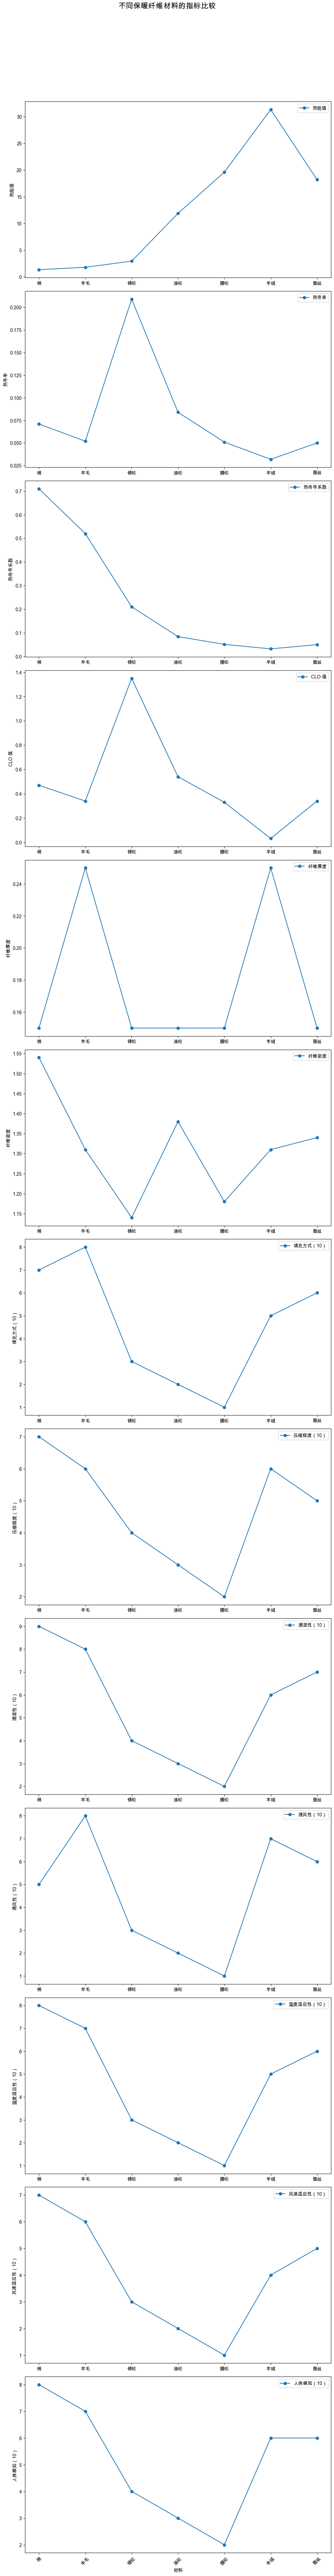

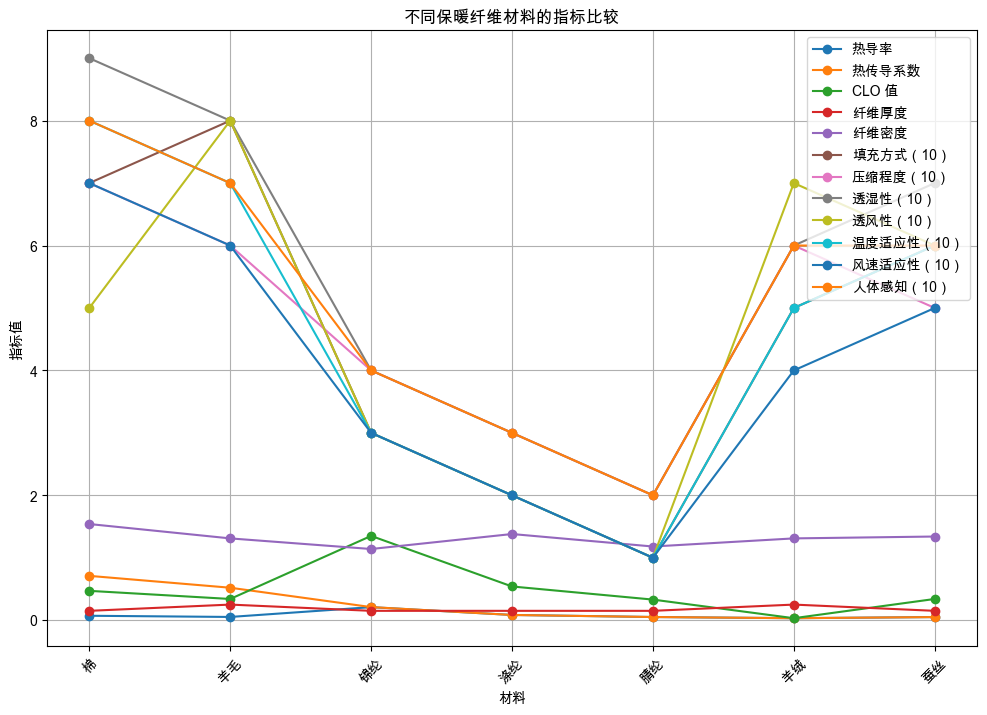

<Figure size 1200x800 with 0 Axes>

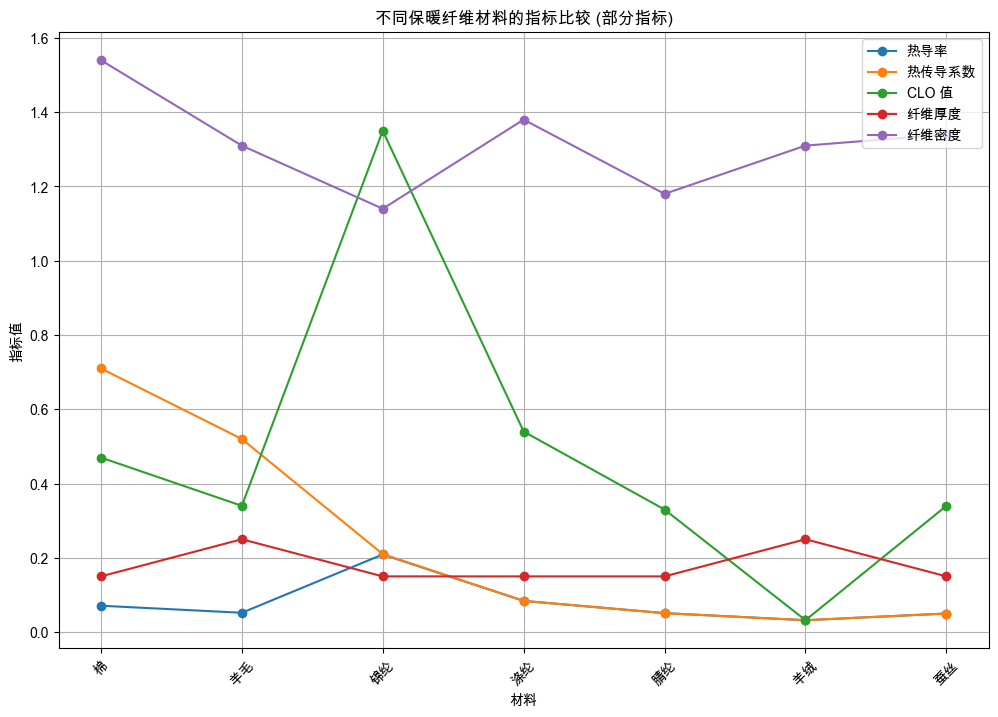

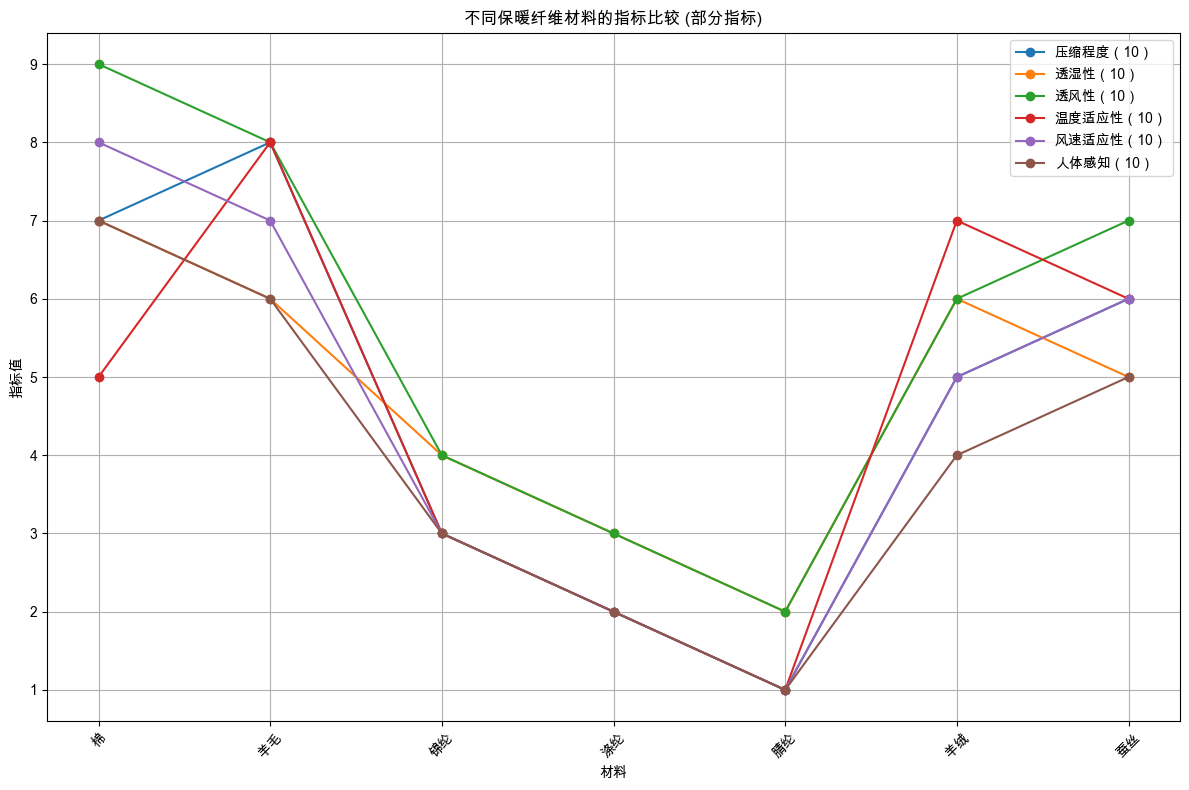

In [ ]:

# 各个折线子图
fig, axs = plt.subplots(nrows=len(indicators), ncols=1, figsize=(10, 80))
for ax, data, indicator in zip(axs,  [thermal_resistance,thermal_conductivity, thermal_conductivity_coefficient,
                                      CLO_value, fiber_thickness, fiber_density,filling_method,
                                      compression_degree, moisture_permability,air_permeability, 
                                      temperature_adaptability, wind_speed_adaptability,human_perception],  
                                      indicators):
    ax.plot(materials, data, marker='o', linestyle='-', label=indicator)
    ax.legend()
    # ax.grid(True)
    ax.set_ylabel(indicator)
plt.xlabel('材料')
fig.suptitle('不同保暖纤维材料的指标比较', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.xticks(rotation=45)
plt.show()

# 创建综合图0
plt.figure(figsize=(12, 8))
for data, indicator in zip([thermal_conductivity, thermal_conductivity_coefficient,
                            CLO_value, fiber_thickness, fiber_density,filling_method, 
                            compression_degree, moisture_permability,air_permeability, 
                            temperature_adaptability, wind_speed_adaptability,human_perception], 
                            indicators[1:]):
    plt.plot(materials, data, marker='o', linestyle='-', label=indicator)
    
plt.xlabel('材料')
plt.ylabel('指标值')
plt.title('不同保暖纤维材料的指标比较')
plt.xticks(rotation=45)
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.figure(figsize=(12, 8))
for data, indicator in zip([], indicators[7:]):
    plt.plot(materials, data, marker='o', linestyle='-', label=indicator)

# 创建综合图1
plt.figure(figsize=(12, 8))
for data, indicator in zip([thermal_conductivity, thermal_conductivity_coefficient,
                            CLO_value, fiber_thickness, fiber_density], indicators[1:7]):
    plt.plot(materials, data, marker='o', linestyle='-', label=indicator)

plt.xlabel('材料')
plt.ylabel('指标值')
plt.title('不同保暖纤维材料的指标比较 (部分指标)')
plt.xticks(rotation=45)
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.grid(True)

# 创建综合图2
plt.figure(figsize=(12, 8))
for data, indicator in zip([filling_method, compression_degree, moisture_permability,
                            air_permeability, temperature_adaptability, wind_speed_adaptability,
                            human_perception], indicators[7:]):
    plt.plot(materials, data, marker='o', linestyle='-', label=indicator)

plt.xlabel('材料')
plt.ylabel('指标值')
plt.title('不同保暖纤维材料的指标比较 (部分指标)')
plt.xticks(rotation=45)
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:

def radar_chart(data, spoke_labels):
	theta = np.linspace(0, 2 * np.pi, len(spoke_labels), endpoint=False)

	# 创建雷达图
	fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

	# 绘制数据
	for d in data:
			ax.plot(theta, d)
			ax.fill(theta, d, alpha=0.25)

	# 设置标题
	ax.set_title( '不同保暖纤维的比较', weight='bold', size='17', position=(0.5, 1.15),
								horizontalalignment='center', verticalalignment='center')

	# 设置标签
	ax.set_xticklabels(spoke_labels)


    # add legend relative to top-left plot
	labels = ('棉', '羊毛', '锦纶', '涤纶', '腈纶', '羊绒', '蚕丝')
	legend = ax[0, 0].legend(labels, loc=(0.9, .95),
														labelspacing=0.1, fontsize='small')

	plt.show()

TypeError: 'PolarAxes' object is not subscriptable

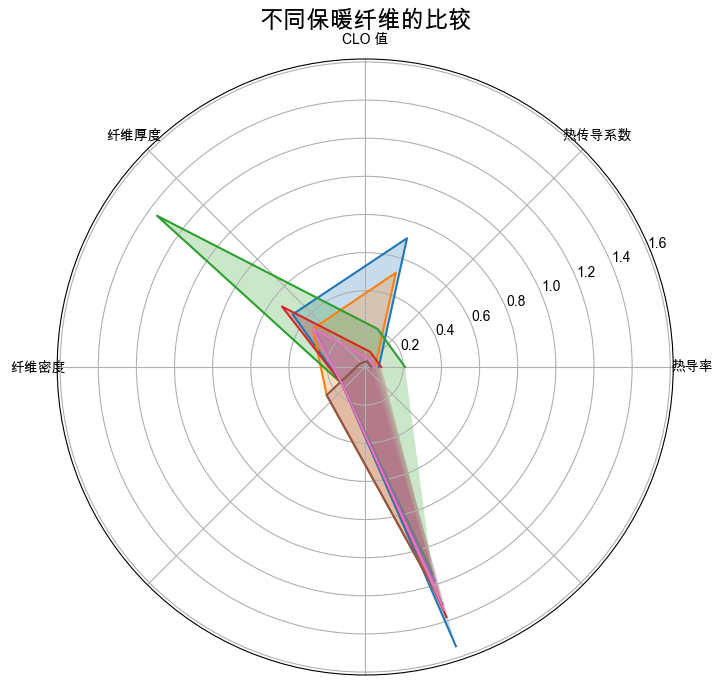

In [ ]:

# 定义数据
data1 = [
        [ 0.071, 0.71, 0.47, 0.15, 1.54],
        [ 0.052, 0.52, 0.34, 0.25, 1.31],
        [ 0.209, 0.21, 1.35, 0.15, 1.14,],
        [ 0.084, 0.084, 0.54, 0.15, 1.38],
        [ 0.051, 0.051, 0.33, 0.15, 1.18],
        [ 0.032, 0.032, 0.032, 0.25, 1.31],
        [ 0.05, 0.05, 0.34, 0.15, 1.34]
]
spoke_labels1 = ['热导率', '热传导系数', 'CLO 值', '纤维厚度', '纤维密度']
# data2 = [
#         [ 7, 7, 9, 5, 8, 7, 8],
#         [ 8, 6, 8, 8, 7, 6, 7],
#         [  3, 4, 4, 3, 3, 3, 4],
#         [  2, 3, 3, 2, 2, 2, 3],
#         [ 1, 2, 2, 1, 1, 1, 2],
#         [ 5, 6, 6, 7, 5, 4, 6],
#         [  6, 5, 7, 6, 6, 5, 6]
# ]
# spoke_labels2 = [ '填充方式（10）', '压缩程度（10）', '透湿性（10）','透风性（10）', 
#                   '温度适应性（10）', '风速适应性（10）', '人体感知（10）']


radar_chart(data1, spoke_labels1)
# radar_chart(data2, spoke_labels2)